# Regressão Logística

Este notebook tem por objetivo introduzir os conceitos básicos sobre regressão logística, nele faremos uma breve introdução teórica ao assunto e adiante construiremos um baseline para um caso concreto.

A regressão logística é um algoritmo de classificação utilizado para atribuir observações a um conjunto discreto de classes. Alguns exemplos de problemas de classificação são detecção de spam em emails (spam ou não spam), detecção de fraudes em transações online (fraude ou não fraude), reconhecimento de tumor (maligno ou benigno) . A regressão logística transforma sua saída usando a função sigmóide logística para retornar um valor de probabilidade.
Entretanto, é importante ter em mente que a regressão logística não é apenas utilizada para classificar coisas entre duas categorias. Sendo um pouco mais técnico, a regressão logística trabalha com os conceitos de estatística e probabilidade. Como apropriadamente dito na Wikipedia, “a regressão logística mede a relação entre a variável dependente categórica e uma ou mais variáveis independentes, estimando as probabilidades usando uma função logística”.

Quer dizer que este tipo de algoritmo de machine learning analisa diferentes aspectos ou variáveis de um objeto para depois determinar uma classe na qual ele se encaixa melhor.

<img src="./img/lgr.png"/>

Podemos chamar de Regressão Logística um modelo de Regressão Linear, mas a Regressão Logística utiliza uma função de custo mais complexa, esta função de custo pode ser definida como a 'função Sigmoid' ou também conhecida como a 'função logística' em vez de uma função linear.

A hipótese de regressão logística tende a limitar a função de custo entre 0 e 1. Portanto, as funções lineares não a representam, pois pode ter um valor maior que 1 ou menor que 0, o que não é possível de acordo com a hipótese de regressão logística.

<img src="./img/range.png"/>

## O que é a função Sigmoid?
Para mapear os valores previstos para as probabilidades, usamos a função Sigmoid. A função mapeia qualquer valor real em outro valor entre 0 e 1. Na aprendizagem da máquina, usamos sigmoid para mapear as previsões para as probabilidades.

<img src="./img/graph.png"/>

### Quais são os tipos de regressão logística ?
1. Binária
2. Ordinal
3. Multinomial

#### Regressão logística binominal
No modelo de regressão logística binária (ou binominal), os objetos são classificados em dois grupos ou categorias. É quase um jogo entre o que é e o que não é. Por exemplo, a mensagem é spam ou não, a imagem é colorida ou não, a célula é cancerígena ou não.

#### Regressão logística ordinal
O modelo de regressão logística ordinal é diferente porque trabalha com o conceito de categorias ordenadas. Neste caso, os objetos são classificados em três ou mais classes que possuem uma ordem já determinada. Por exemplo, o desempenho do atleta é ruim, justo ou excelente. Outro exemplo: o grau de satisfação do paciente com o tratamento é insatisfeito, satisfeito ou muito satisfeito.

#### Regressão logística multinomial
No modelo de regressão logística multinomial, os objetos são classificados em três ou mais categorias que não possuem ordem entre si. Vamos aos exemplos. Este animal é um gato, um leão ou um tigre. Esta fruta é uma maçã, uma pera, uma manga ou um maracujá.

### Premissas da Regressão Logística
- A regressão logística binária exige que a variável dependente seja binária.
- Para uma regressão binária, o fator nível 1 da variável dependente deve representar o resultado desejado.
- Somente as variáveis significativas devem ser incluídas.
- As variáveis independentes devem ser independentes uma da outra. Ou seja, o modelo deve ter pouca ou nenhuma  multicolinearidade.
- As variáveis independentes são linearmente relacionadas com as probabilidades de log.
- A regressão logística requer tamanhos de amostra bastante grandes.

Levando em conta as suposições acima, vamos olhar começar a por as mãos na massa e trabalhar em nosso conjunto de dados !

#### Dataset de dígitos
Neste tutorial utilizaremos o conjunto de dados (dataset) "load_digits", ele consiste em um conjunto de imagens de dígitos ( 0 a 9), nosso objetivo é treinar um modelo capaz de reconhecer cada dígito a partir da imagem de entrada. Ou seja, vamos realizar uma regressão logística multinomial!

In [9]:
# Importando dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
# Mostrando que existem 1797 imagens (imagens 8 x 8 , ou seja, de dimensionalidade 64)
print("Image Data Shape" , digits.data.shape)
# Mostrando que existem 1797 labels (inteiros de 0 a 9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


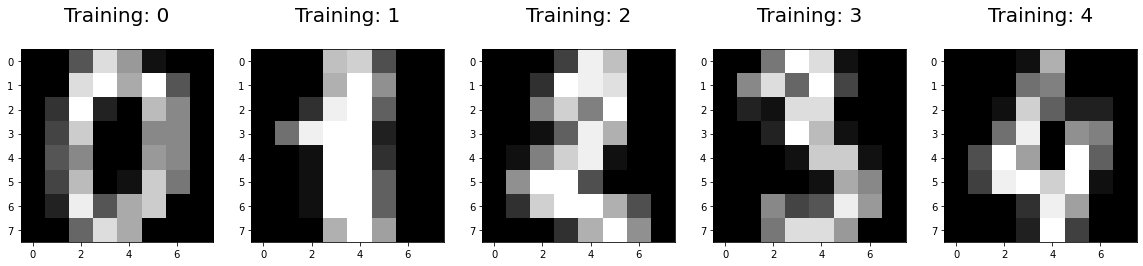

In [11]:
# Plotando as imagens para uma visualização mais clara dos dados 
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [12]:
# Dividindo o conjunto de dados entre treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [ ]:
# Importando modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
# Criando instância do modelo
logisticRegr = LogisticRegression()
# Treinando o modelo
logisticRegr.fit(x_train, y_train)

##### Observação
O modelo "LogisticRegression()" do sklearn pode receber parâmetros para otmizar o treinamento de acordo com a necessidade de cada problema enfrentado, entretando não nos atentaremos para isso no momento para simplificar as coisas.

In [14]:
# Utilizando o modelo para reconhecer o dígito de uma imagem específica
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [15]:
# Utilizando o modelo para reconhecer uma sequência de dígitos
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
# Utilizando o modelo para reconhecer os dígitos de todas as imagens do conjunto de teste
predictions = logisticRegr.predict(x_test)

In [17]:
# Utilizando o médoto score para medir a acurácia do modelo
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


##### Observação
O modelo apresentou uma taxa de acerto de 95,1%, apesar do score bem satisfatório , trata-se de um conjunto de dados muito simples. Desse modo para se chegar em um resultado parecido em tarefas de regressão logística reais o modelo necessitaria de diversas otimizações.